# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
# MOMENTUM = 0.95


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0718 15:43:02.157393  6464 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0718 15:43:02.160866  6464 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 15:43:02.225845  6464 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 15:43:02.228819  6464 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 15:43:02.238739  6464 depr

Experiment with LR = 0.100000
_________________________________________________________________

W0718 15:43:02.502115  6464 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.




Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0718 15:43:02.794260  6464 deprecation.py:323] From C:\Users\Rosa\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 494us/step - loss: 14.4473 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 25s 496us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 18s 365us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 18s 367us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 20s 391us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 18s 354us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 18s 351us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 17s 338us/step - loss: 14.4220 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 17s 340us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 16s 323us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 16s 310us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 16s 318us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 17s 341us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 16s 313us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 18s 360us/step - loss: 1.9154 - acc: 0.3048 - val_loss: 1.7956 - val_acc: 0.3656
Epoch 2/50
50000/50000 [==============================] - 16s 310us/step - loss: 1.7001 - acc: 0.3921 - val_loss: 1.6377 - val_acc: 0.4103
Epoch 3/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.6072 - acc: 0.4280 - val_loss: 1.5494 - val_acc: 0.4482
Epoch 4/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.5464 - acc: 0.4519 - val_loss: 1.5871 - val_acc: 0.4287
Epoch 5/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.4970 - acc: 0.4653 - val_loss: 1.5010 - val_acc: 0.4690
Epoch 6/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.4540 - acc: 0.4832 - val_loss: 1.5075 - val_acc: 0.4649
Epoch 7/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.4271 - acc: 0.4916 - val_loss: 1.4899 - val_acc: 0.4626
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.7166 - acc: 0.3937 - val_loss: 1.6673 - val_acc: 0.4061
Epoch 3/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.6286 - acc: 0.4274 - val_loss: 1.6019 - val_acc: 0.4308
Epoch 4/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.5766 - acc: 0.4464 - val_loss: 1.5596 - val_acc: 0.4489
Epoch 5/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.5308 - acc: 0.4602 - val_loss: 1.5402 - val_acc: 0.4564
Epoch 6/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.4921 - acc: 0.4729 - val_loss: 1.5052 - val_acc: 0.4667
Epoch 7/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.4608 - acc: 0.4866 - val_loss: 1.4893 - val_acc: 0.4696
Epoch 8/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.4340 - acc: 0.4943 - val_loss: 1.4727 - val_acc: 0.4701
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 15s 309us/step - loss: 1.9357 - acc: 0.3257 - val_loss: 1.8885 - val_acc: 0.3463
Epoch 3/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.8563 - acc: 0.3535 - val_loss: 1.8305 - val_acc: 0.3625
Epoch 4/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.8070 - acc: 0.3735 - val_loss: 1.7890 - val_acc: 0.3794
Epoch 5/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.7705 - acc: 0.3865 - val_loss: 1.7556 - val_acc: 0.3885
Epoch 6/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.7425 - acc: 0.3957 - val_loss: 1.7292 - val_acc: 0.4033
Epoch 7/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.7161 - acc: 0.4053 - val_loss: 1.7126 - val_acc: 0.4059
Epoch 8/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.6945 - acc: 0.4108 - val_loss: 1.6882 - val_acc: 0.4166
Epoch 9/50
50000/50000 [==============

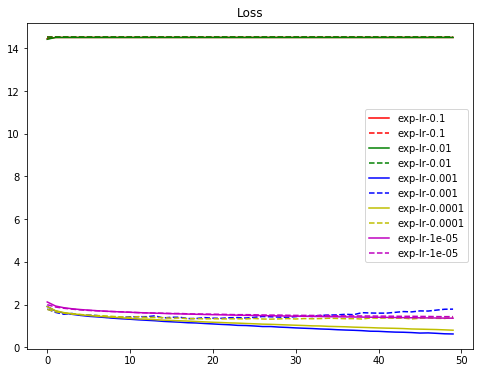

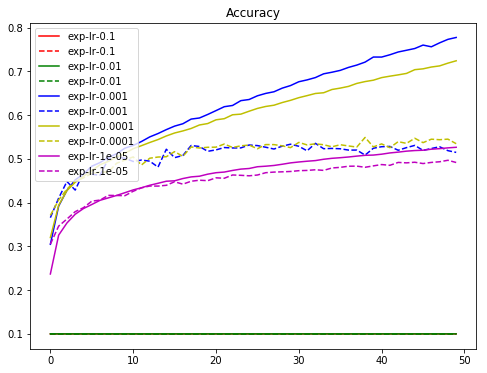

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()